Importing All Neccesary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import tkinter as tk
from tkinter import ttk


Loading the CSV

In [2]:
heart_disease = pd.read_csv(r"C:\Users\shanm\Downloads\heart disease prediction.csv")

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0.0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0.0,0,2,1
2,41.0,0,1,130,204,0,0,172,0,1.4,2.0,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2.0,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2.0,0,2,1


In [4]:
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57.0,0,0,140,241,0,1,123,1,0.2,1.0,0,3,0
299,45.0,1,3,110,264,0,1,132,0,1.2,1.0,0,3,0
300,68.0,1,0,144,193,1,1,141,0,3.4,1.0,2,3,0
301,57.0,1,0,130,131,0,1,115,1,1.2,1.0,1,3,0
302,57.0,0,1,130,236,0,0,174,0,0.0,1.0,1,2,0


In [5]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     302 non-null    float64
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


The Datatypes seems fine. Let's check for Nulls 

In [6]:
heart_disease.isnull().any()

age          True
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope        True
ca          False
thal        False
target      False
dtype: bool

In [7]:
null_count_age = heart_disease['age'].isnull().sum()
total_count_age = len(heart_disease['age'])
null_percentage_age = (null_count_age / total_count_age) * 100

null_count_slope = heart_disease['slope'].isnull().sum()
total_count_slope = len(heart_disease['slope'])
null_percentage_slope = (null_count_slope / total_count_slope) * 100

print(f"The percentage of null values in 'age' is: {null_percentage_age:.2f}%")
print(f"The percentage of null values in 'slope' is: {null_percentage_slope:.2f}%")


The percentage of null values in 'age' is: 0.66%
The percentage of null values in 'slope' is: 0.33%


This is very less. So we can drop those rows

In [8]:
heart_disease.dropna(inplace= True)
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0.0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0.0,0,2,1
2,41.0,0,1,130,204,0,0,172,0,1.4,2.0,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2.0,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241,0,1,123,1,0.2,1.0,0,3,0
299,45.0,1,3,110,264,0,1,132,0,1.2,1.0,0,3,0
300,68.0,1,0,144,193,1,1,141,0,3.4,1.0,2,3,0
301,57.0,1,0,130,131,0,1,115,1,1.2,1.0,1,3,0


In [9]:
heart_disease['age'] = heart_disease['age'].astype('int64')
heart_disease['slope'] = heart_disease['slope'].astype('int64')

In [10]:
heart_disease.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [11]:
categorical_cols = []
numerical_cols = []
for i, col in enumerate(heart_disease.columns):
    if col != 'target':
        unique_value_count = heart_disease[col].nunique()
        if unique_value_count <= 4:
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)


In [12]:
numerical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [13]:
categorical_cols

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [14]:
numerical_df = heart_disease[numerical_cols]
numerical_df.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000
mean,54.376667,131.52000,246.040000,149.733333,1.041333,0.726667
std,9.081282,17.58276,51.930218,22.915481,1.160278,1.017549
min,29.000000,94.00000,126.000000,71.000000,0.000000,0.000000
25%,47.750000,120.00000,211.000000,133.750000,0.000000,0.000000
50%,55.500000,130.00000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.00000,274.250000,166.250000,1.600000,1.000000
max,77.000000,200.00000,564.000000,202.000000,6.200000,4.000000


In [15]:
# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()
correlation_matrix

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.279295,0.222213,-0.395048,0.201659,0.289866
trestbps,0.279295,1.000000,0.122595,-0.041581,0.192275,0.101064
chol,0.222213,0.122595,1.000000,-0.012422,0.061235,0.062614
thalach,-0.395048,-0.041581,-0.012422,1.000000,-0.339462,-0.217853
oldpeak,0.201659,0.192275,0.061235,-0.339462,1.000000,0.233956
ca,0.289866,0.101064,0.062614,-0.217853,0.233956,1.000000


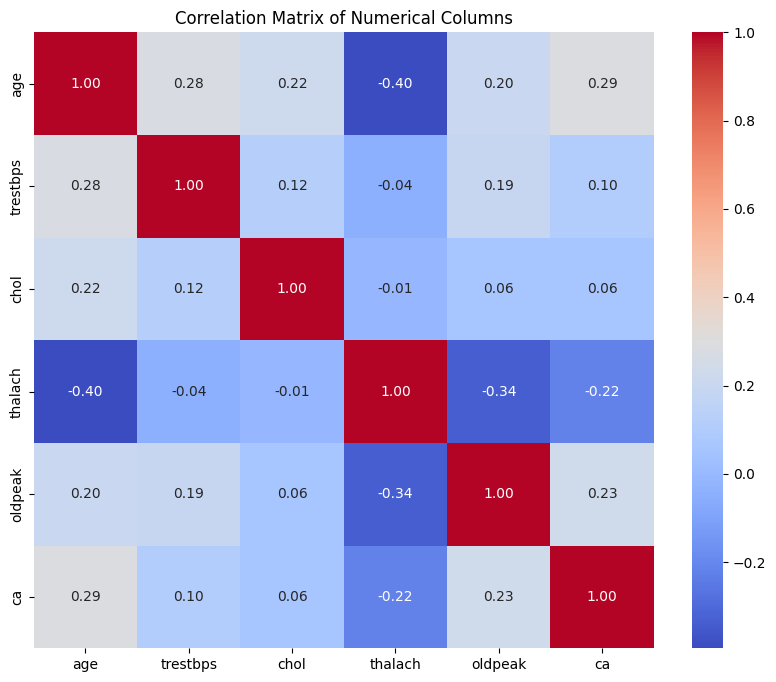

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


C:\Users\shanm\AppData\Local\Temp\ipykernel_5932\3512208704.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, data = heart_disease, ax = axes[i], palette = 'rocket')
C:\Users\shanm\AppData\Local\Temp\ipykernel_5932\3512208704.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, data = heart_disease, ax = axes[i], palette = 'rocket')
C:\Users\shanm\AppData\Local\Temp\ipykernel_5932\3512208704.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = col, data = heart_disease, ax = axes[i], palette = 'rocket')
C:\Users\shanm\A

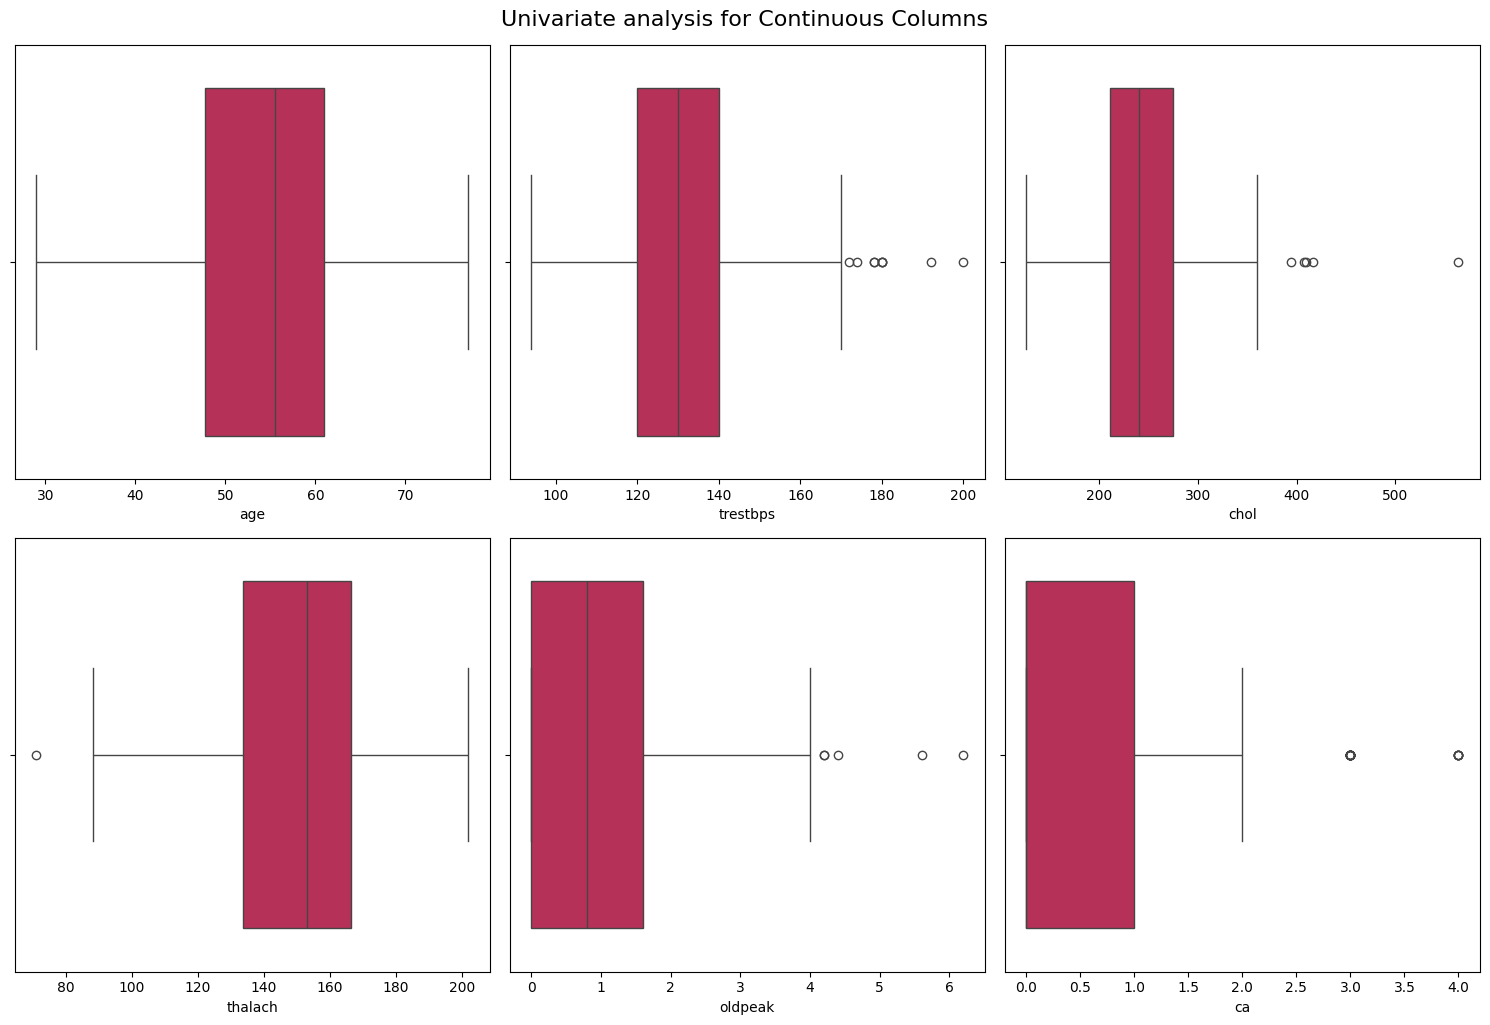

In [17]:
fig , axes = plt.subplots(nrows= 2, ncols= 3, figsize= (15,10))
axes = axes.flatten()

for i , col in enumerate(numerical_cols):
    sns.boxplot(x = col, data = heart_disease, ax = axes[i], palette = 'rocket')

plt.tight_layout()
plt.suptitle("Univariate analysis for Continuous Columns", y=1.02, fontsize=16)
plt.show()

C:\Users\shanm\AppData\Local\Temp\ipykernel_5932\3559562674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, data = heart_disease, ax = axes[i], palette = 'rocket')
C:\Users\shanm\AppData\Local\Temp\ipykernel_5932\3559562674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, data = heart_disease, ax = axes[i], palette = 'rocket')
C:\Users\shanm\AppData\Local\Temp\ipykernel_5932\3559562674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, data = heart_disease, ax = axes[i], palette = 'rocket')
C:\Users\s

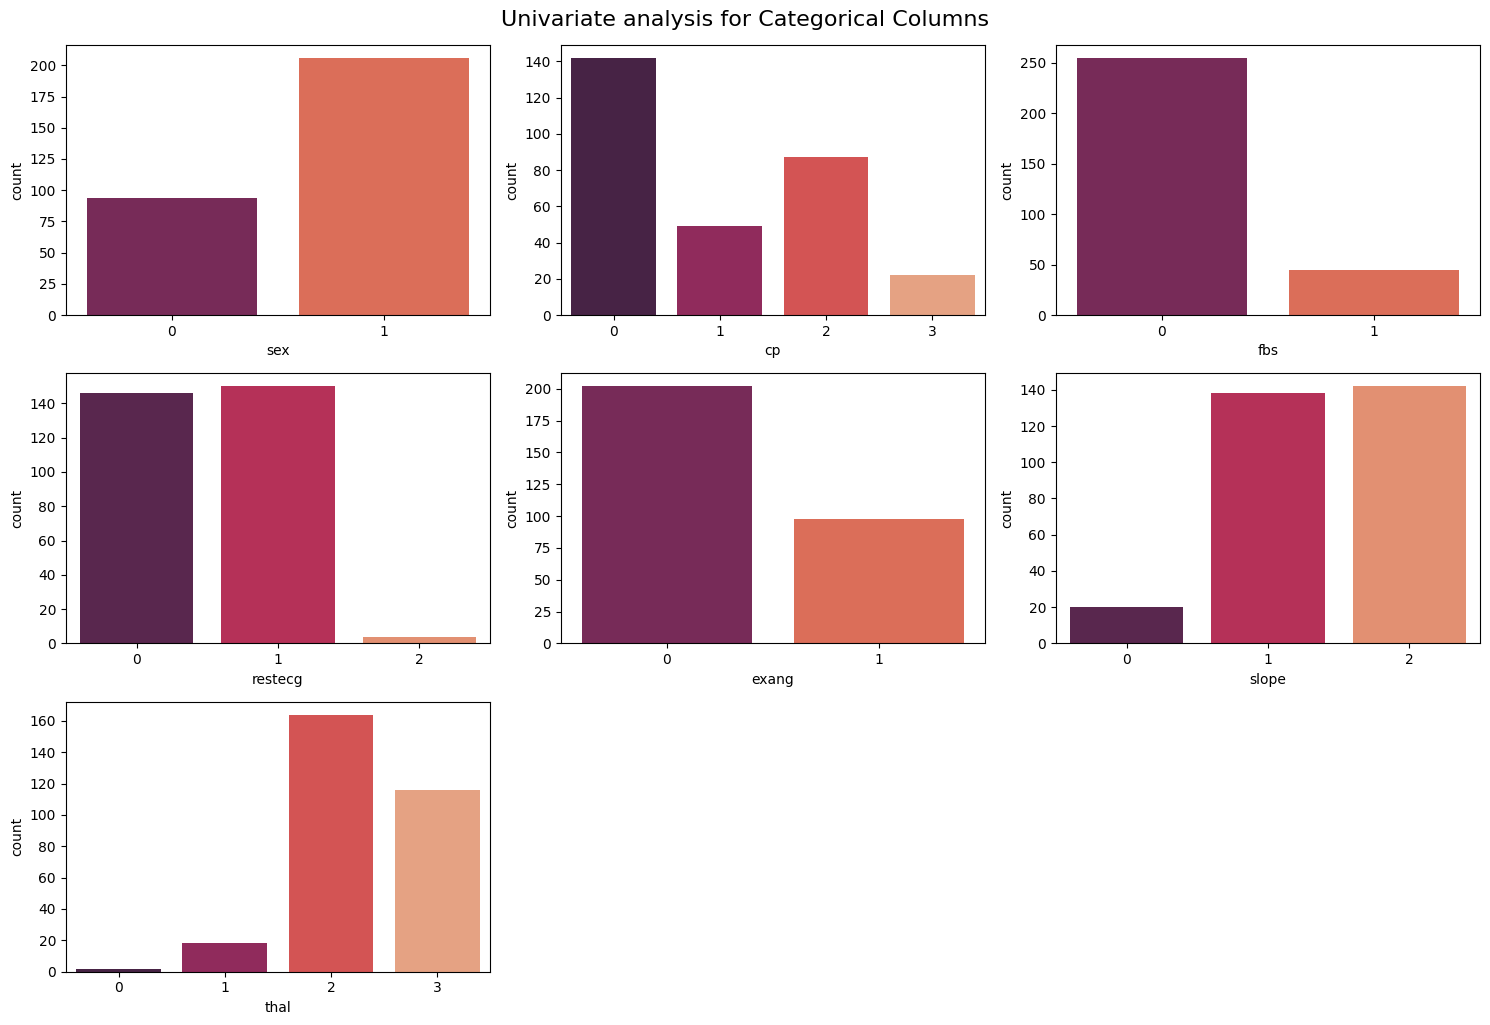

In [18]:
fig , axes = plt.subplots(nrows= 3, ncols= 3, figsize= (15,10))
axes = axes.flatten()

for i , col in enumerate(categorical_cols):
    sns.countplot(x = col, data = heart_disease, ax = axes[i], palette = 'rocket')

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Univariate analysis for Categorical Columns", y=1.02, fontsize=16)
plt.show()

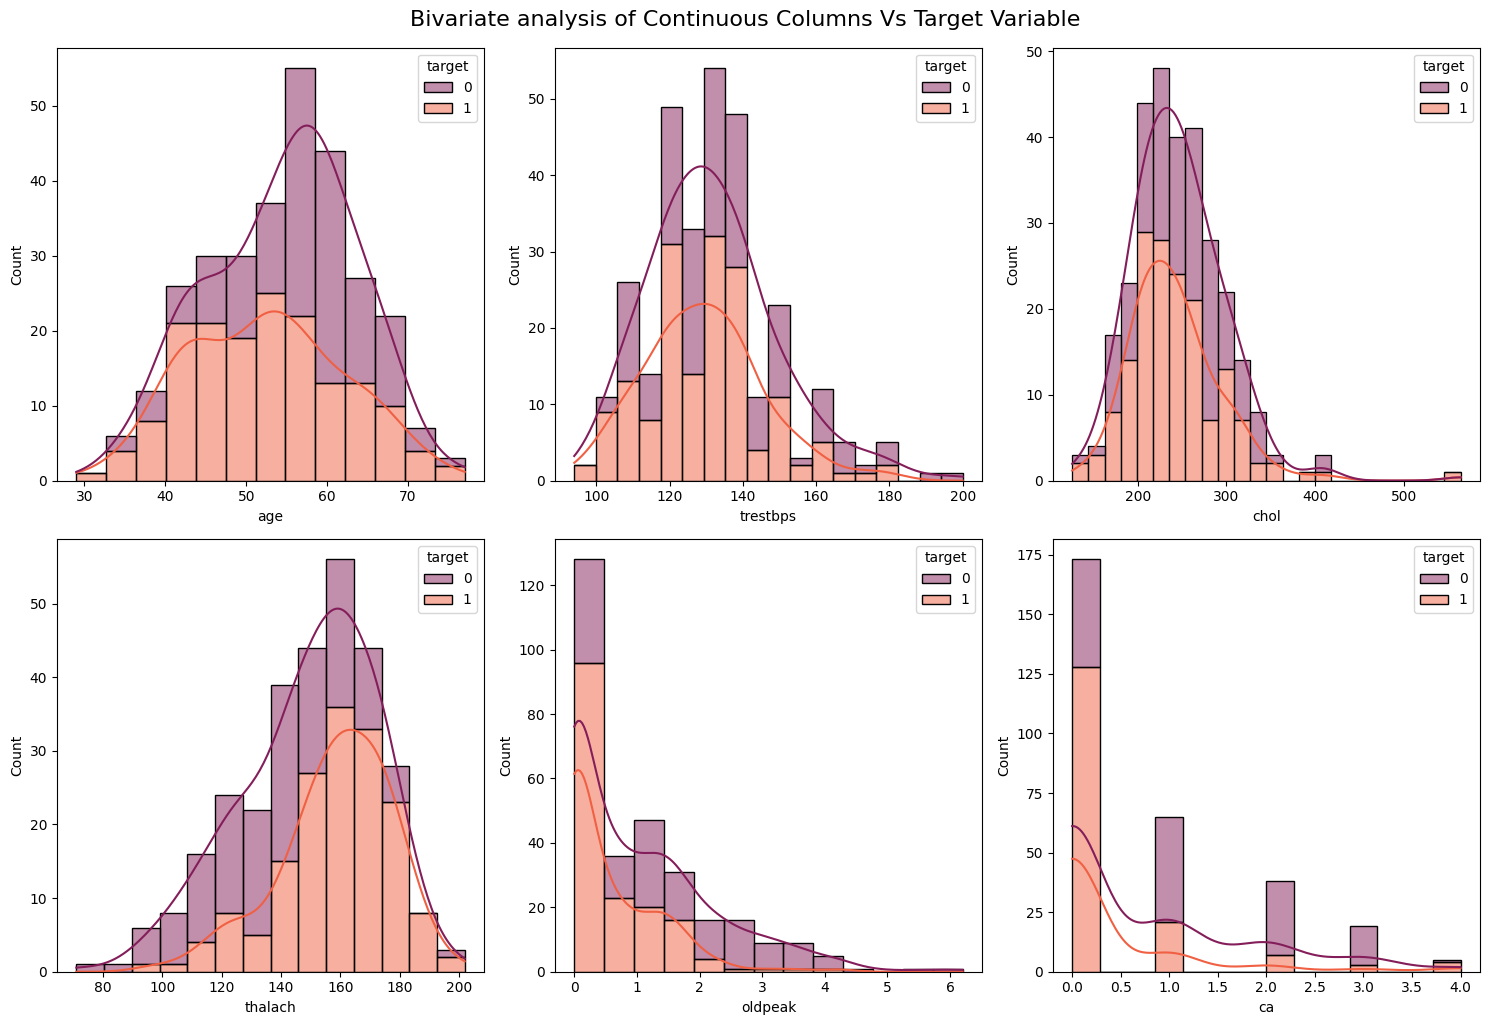

In [19]:
fig , axes = plt.subplots(nrows= 2, ncols= 3, figsize= (15,10))
axes = axes.flatten()

for i , col in enumerate(numerical_cols):
    sns.histplot(data=heart_disease, x=col, hue='target', kde=True, multiple='stack', palette='rocket', ax=axes[i])

plt.tight_layout()
plt.suptitle("Bivariate analysis of Continuous Columns Vs Target Variable", y=1.02, fontsize=16)
plt.show()

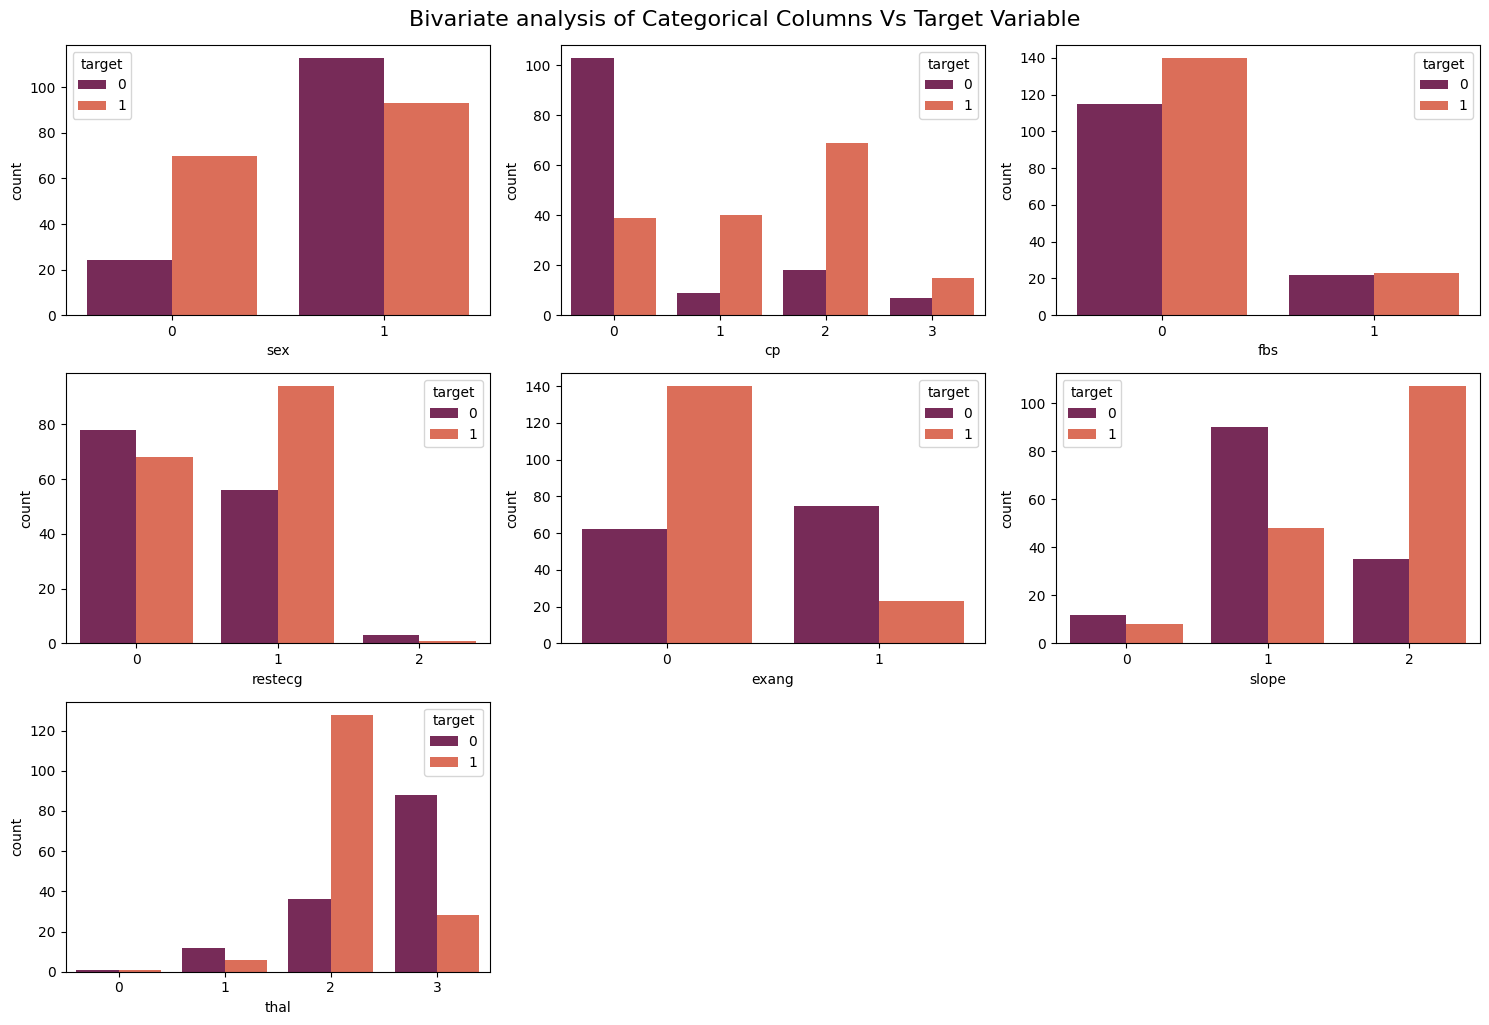

In [20]:
fig , axes = plt.subplots(nrows= 3, ncols= 3, figsize= (15,10))
axes = axes.flatten()

for i , col in enumerate(categorical_cols):
    sns.countplot(x = col, hue = 'target', data = heart_disease, ax = axes[i], palette = 'rocket')

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Bivariate analysis of Categorical Columns Vs Target Variable", y=1.02, fontsize=16)
plt.show()

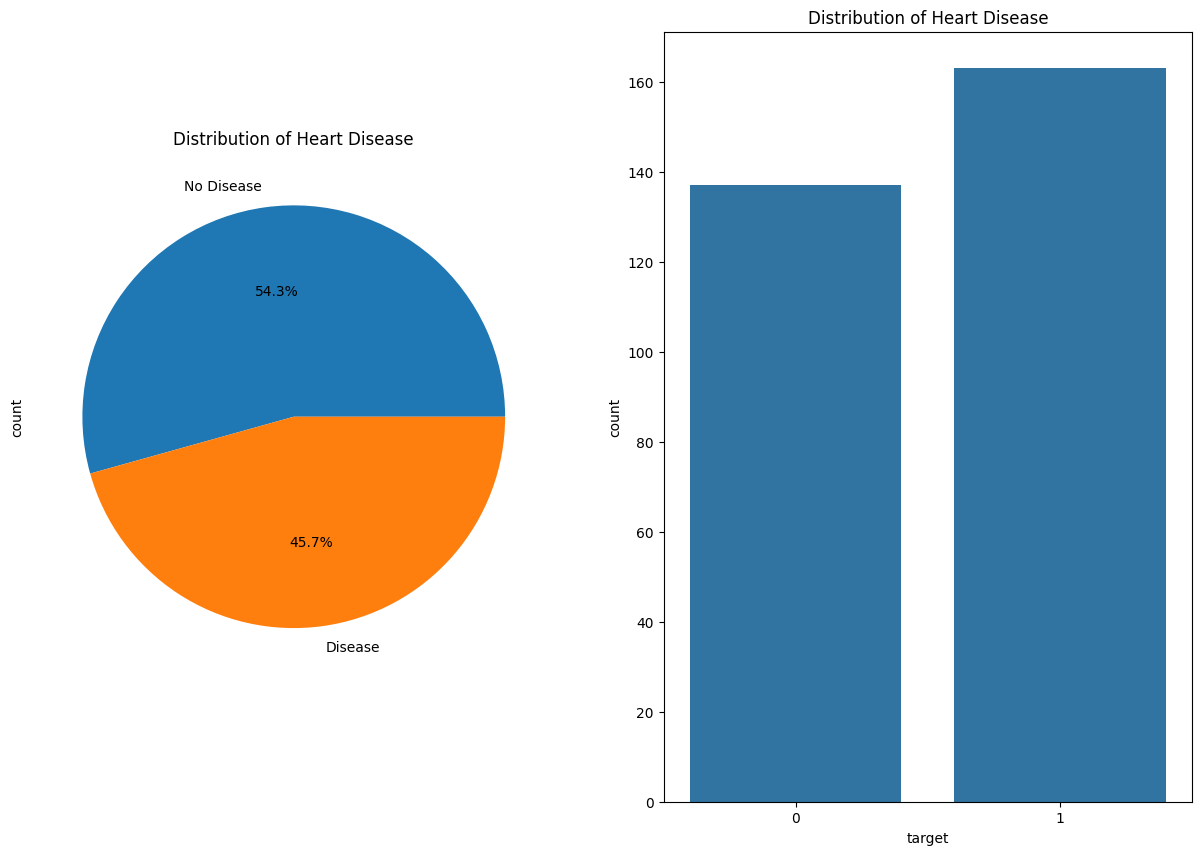

In [21]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes = axes.flatten()

# Pie Chart
heart_disease['target'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], labels=['No Disease', 'Disease'])
axes[0].set_title('Distribution of Heart Disease')

# Count Plot
sns.countplot(x='target', data=heart_disease, ax=axes[1])
axes[1].set_title('Distribution of Heart Disease')

plt.show()


In [22]:
x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size= 0.30, random_state=42)

In [24]:
scaler = StandardScaler()

x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

In [25]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

results = []

for name, model in models.items():
    # Train the model
    model.fit(x_train_normalized, y_train)

    # Make predictions
    y_pred = model.predict(x_test_normalized)
    y_pred_prob = model.predict_proba(x_test_normalized)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Append to results list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })

# Create DataFrame from the list of dictionaries
metrics_df = pd.DataFrame(results)

# Display the DataFrame
metrics_df



,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.811111,0.807692,0.857143,0.831683,0.879542
1,Decision Tree,0.677778,0.812500,0.530612,0.641975,0.692135
2,Random Forest,0.822222,0.836735,0.836735,0.836735,0.876058
3,SVM,0.833333,0.826923,0.877551,0.851485,0.856645
4,KNN,0.833333,0.826923,0.877551,0.851485,0.834495
5,XGBoost,0.788889,0.812500,0.795918,0.804124,0.854156


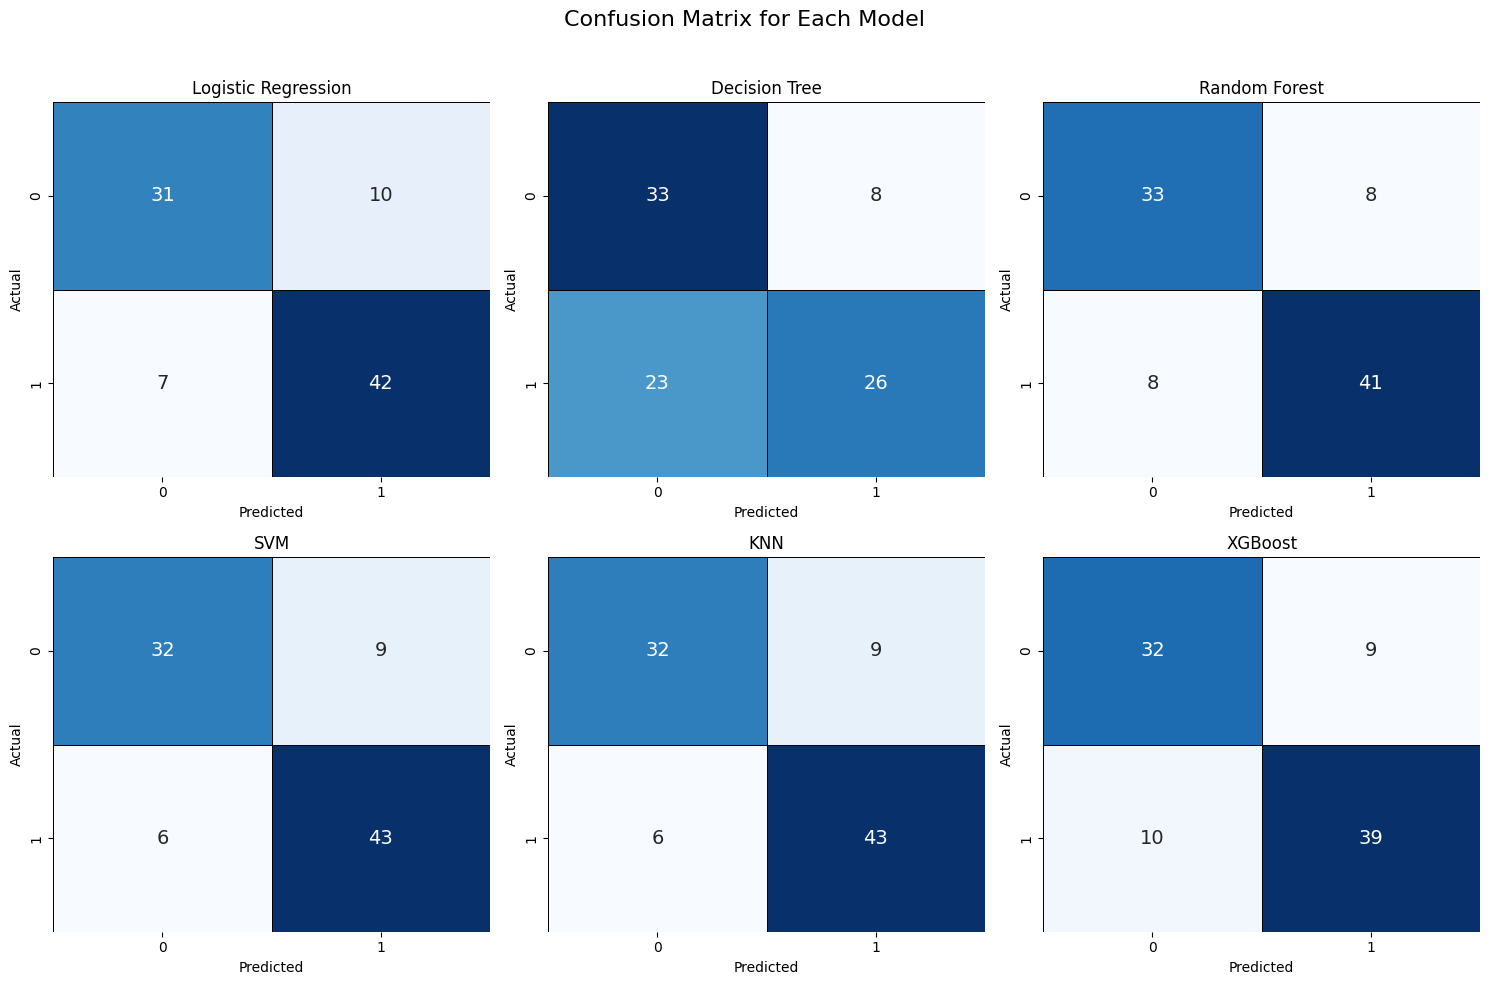

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Confusion Matrix for Each Model', fontsize=16)

for (name, model), ax in zip(models.items(), axes.flatten()):
    # Train the model
    model.fit(x_train_normalized, y_train)

    # Make predictions
    y_pred = model.predict(x_test_normalized)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={'size': 14}, linewidths=0.5, linecolor='black', ax=ax)

    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

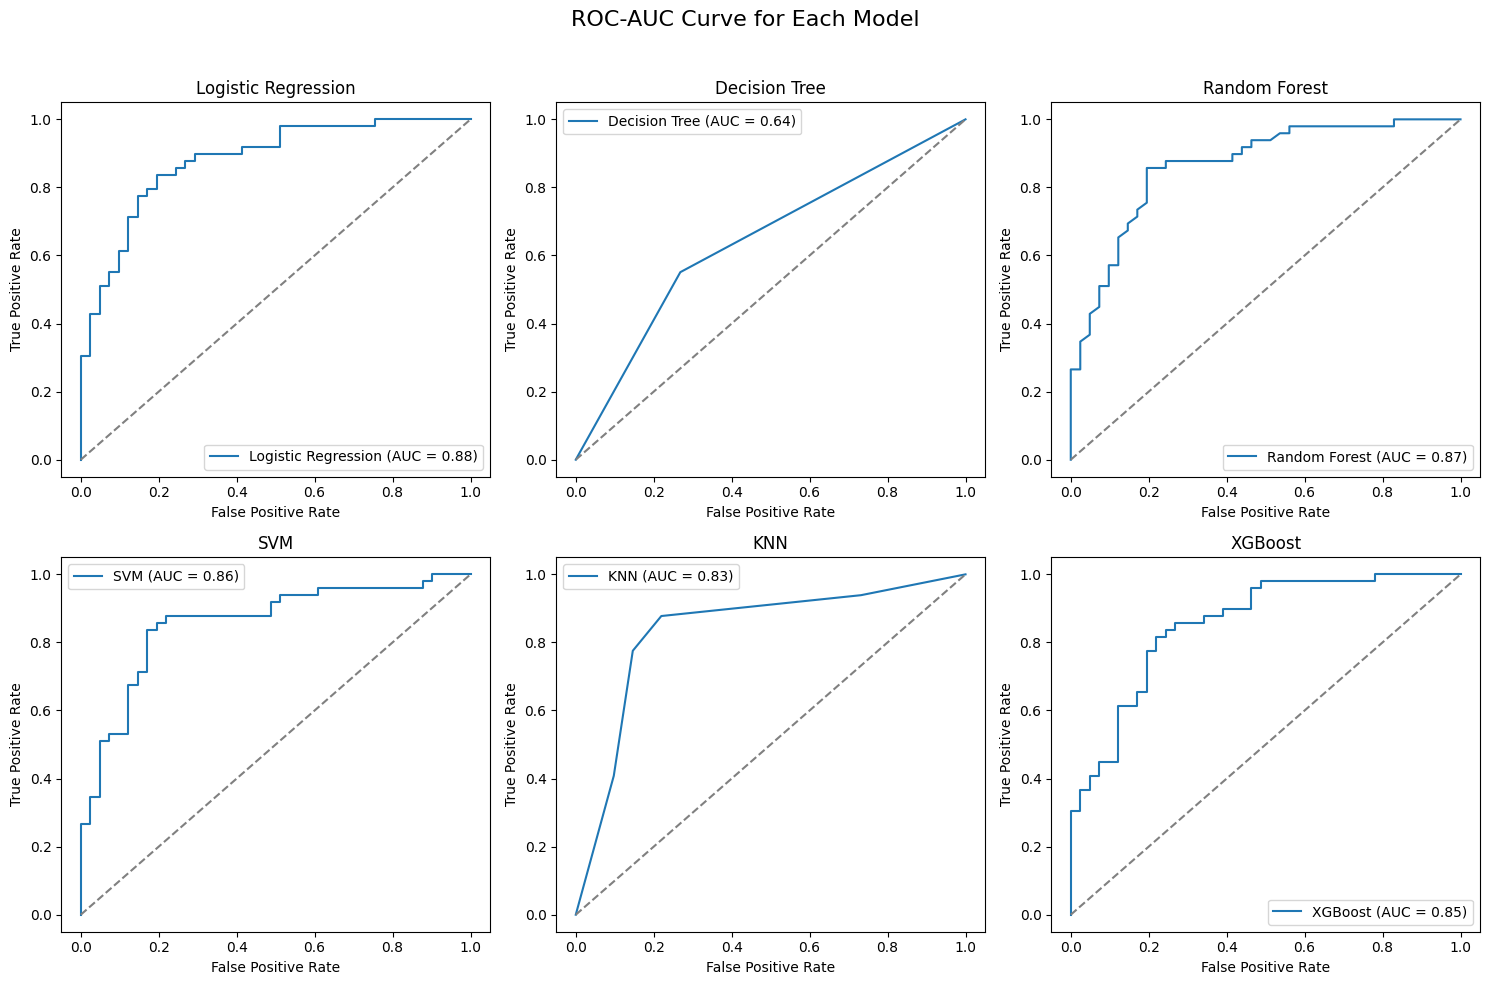

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('ROC-AUC Curve for Each Model', fontsize=16)

for (name, model), ax in zip(models.items(), axes.flatten()):
    # Train the model
    model.fit(x_train_normalized, y_train)

    # Make predictions
    y_pred_prob = model.predict_proba(x_test_normalized)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], '--', color='gray')

    ax.set_title(name)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Hyper Parameter Tuning

In [28]:
# Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

lr = LogisticRegression(random_state=42)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(x_train_normalized, y_train)

# Decision Tree
param_grid_dt = {
    'max_depth': [None, 3, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(x_train_normalized, y_train)

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train_normalized, y_train)

# SVM
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True, random_state=42)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(x_train_normalized, y_train)

# KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train_normalized, y_train)

# XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb = XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(x_train_normalized, y_train)

# Results
results = {
    'Logistic Regression': grid_search_lr.best_params_,
    'Decision Tree': grid_search_dt.best_params_,
    'Random Forest': grid_search_rf.best_params_,
    'SVM': grid_search_svm.best_params_,
    'KNN': grid_search_knn.best_params_,
    'XGBoost': grid_search_xgb.best_params_
}

# Display results
for model, params in results.items():
    print(f"Best Hyperparameters for {model}: {params}")


best_lr = grid_search_lr.best_estimator_
best_dt = grid_search_dt.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_svm = grid_search_svm.best_estimator_
best_knn = grid_search_knn.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

y_pred_lr = best_lr.predict(x_test_normalized)
y_pred_dt = best_dt.predict(x_test_normalized)
y_pred_rf = best_rf.predict(x_test_normalized)
y_pred_svm = best_rf.predict(x_test_normalized)
y_pred_knn = best_rf.predict(x_test_normalized)
y_pred_xgb = best_rf.predict(x_test_normalized)


Best Hyperparameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Hyperparameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Hyperparameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best Hyperparameters for KNN: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}


In [29]:
from sklearn.metrics import accuracy_score

# Logistic Regression
train_score_lr = accuracy_score(y_train, best_lr.predict(x_train_normalized))
test_score_lr = accuracy_score(y_test, y_pred_lr)

# Decision Tree
train_score_dt = accuracy_score(y_train, best_dt.predict(x_train_normalized))
test_score_dt = accuracy_score(y_test, y_pred_dt)

# Random Forest
train_score_rf = accuracy_score(y_train, best_rf.predict(x_train_normalized))
test_score_rf = accuracy_score(y_test, y_pred_rf)

# SVM
train_score_svm = accuracy_score(y_train, best_svm.predict(x_train_normalized))
test_score_svm = accuracy_score(y_test, y_pred_svm)

# KNN
train_score_knn = accuracy_score(y_train, best_knn.predict(x_train_normalized))
test_score_knn = accuracy_score(y_test, y_pred_knn)

# XGBoost
train_score_xgb = accuracy_score(y_train, best_xgb.predict(x_train_normalized))
test_score_xgb = accuracy_score(y_test, y_pred_xgb)

# Display scores
print(f"Logistic Regression - Training Score: {train_score_lr:.4f}, Testing Score: {test_score_lr:.4f}")
print(f"Decision Tree - Training Score: {train_score_dt:.4f}, Testing Score: {test_score_dt:.4f}")
print(f"Random Forest - Training Score: {train_score_rf:.4f}, Testing Score: {test_score_rf:.4f}")
print(f"SVM - Training Score: {train_score_svm:.4f}, Testing Score: {test_score_svm:.4f}")
print(f"KNN - Training Score: {train_score_knn:.4f}, Testing Score: {test_score_knn:.4f}")
print(f"XGBoost - Training Score: {train_score_xgb:.4f}, Testing Score: {test_score_xgb:.4f}")


Logistic Regression - Training Score: 0.8571, Testing Score: 0.8111
Decision Tree - Training Score: 0.8571, Testing Score: 0.7333
Random Forest - Training Score: 0.9429, Testing Score: 0.8111
SVM - Training Score: 0.8476, Testing Score: 0.8111
KNN - Training Score: 0.8810, Testing Score: 0.8111
XGBoost - Training Score: 0.9143, Testing Score: 0.8111


In [30]:
# Initialize a list to store the metrics
metrics_list = []

# Evaluate Logistic Regression
y_pred_lr_prob = best_lr.predict_proba(x_test_normalized)[:, 1]
lr_metrics = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1 Score': f1_score(y_test, y_pred_lr),
    'ROC-AUC': roc_auc_score(y_test, y_pred_lr_prob)
}
metrics_list.append(lr_metrics)

# Evaluate Decision Tree
y_pred_dt_prob = best_dt.predict_proba(x_test_normalized)[:, 1]
dt_metrics = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1 Score': f1_score(y_test, y_pred_dt),
    'ROC-AUC': roc_auc_score(y_test, y_pred_dt_prob)
}
metrics_list.append(dt_metrics)

# Evaluate Random Forest
y_pred_rf_prob = best_rf.predict_proba(x_test_normalized)[:, 1]
rf_metrics = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_pred_rf_prob)
}
metrics_list.append(rf_metrics)

# Evaluate Support Vector Machine
y_pred_svm_prob = best_svm.predict_proba(x_test_normalized)[:, 1]
svm_metrics = {
    'Model': 'Support Vector Machine',
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1 Score': f1_score(y_test, y_pred_svm),
    'ROC-AUC': roc_auc_score(y_test, y_pred_svm_prob)
}
metrics_list.append(svm_metrics)

# Evaluate K Nearest Neighbours
y_pred_knn_prob = best_knn.predict_proba(x_test_normalized)[:, 1]
knn_metrics = {
    'Model': 'K Nearest Neighbours',
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1 Score': f1_score(y_test, y_pred_knn),
    'ROC-AUC': roc_auc_score(y_test, y_pred_knn_prob)
}
metrics_list.append(knn_metrics)

# Evaluate XG Boost Classifier
y_pred_xgb_prob = best_xgb.predict_proba(x_test_normalized)[:, 1]
xgb_metrics = {
    'Model': 'XG Boost Classifier',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_xgb_prob)
}
metrics_list.append(xgb_metrics)

# Create a DataFrame from the list of dictionaries
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame
metrics_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.811111,0.796296,0.877551,0.834951,0.871578
1,Decision Tree,0.733333,0.790698,0.693878,0.739130,0.761822
2,Random Forest,0.811111,0.820000,0.836735,0.828283,0.891986
3,Support Vector Machine,0.811111,0.820000,0.836735,0.828283,0.859134
4,K Nearest Neighbours,0.811111,0.820000,0.836735,0.828283,0.831508
5,XG Boost Classifier,0.811111,0.820000,0.836735,0.828283,0.864609


Since Random Forest appears to be the strongest performer , we chose that as our best model.

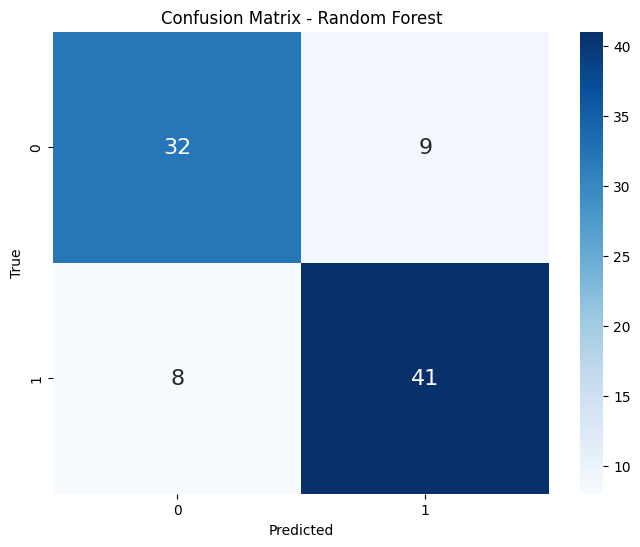

In [31]:
# Make predictions
y_pred_rf = best_rf.predict(x_test_normalized)

# Create a confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

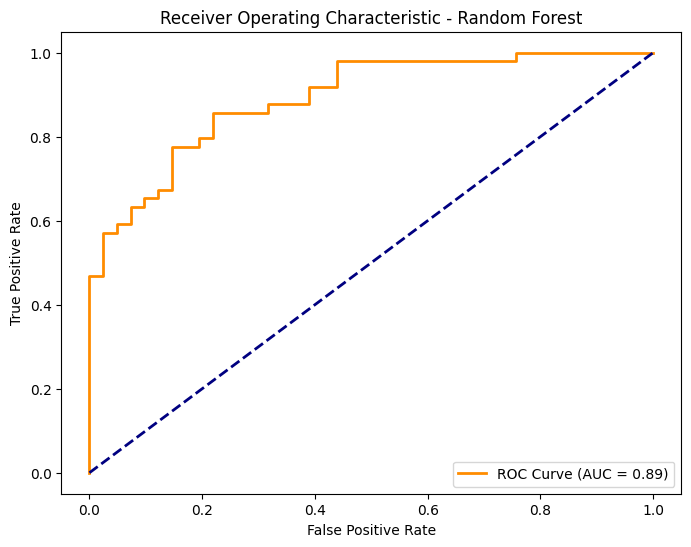

In [32]:
y_pred_rf_prob = best_rf.predict_proba(x_test_normalized)[:, 1]

# Compute ROC curve and ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_rf_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()

GUI using Tkinter to make predictions

In [33]:
class PredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Machine Learning Prediction App")

        # Creating input fields for each feature
        self.feature_labels = ['Age',
                                'Sex (0 or 1)',
                                'CP (0 to 3)',
                                'trestbps (90 - 200)',
                                'chol (120 - 600)',
                                'fbs (0 or 1)',
                                'restecg (0 to 2)',
                                'thalach (70 - 210)',
                                'exang (0 or 1)', 
                                'oldpeak (0.0 to 10.0)', 
                                'slope (0 to 2)', 
                                'ca (0 to 4)', 
                                'thal (0 to 3)']  
        self.feature_entries = []

        for i, feature_label in enumerate(self.feature_labels):
            label = ttk.Label(master, text=feature_label)
            label.grid(row=i, column=0, padx=10, pady=10)

            entry = ttk.Entry(master)
            entry.grid(row=i, column=1, padx=10, pady=10)
            self.feature_entries.append(entry)

        # Create buttons for specific actions
        predict_button = ttk.Button(master, text="Predict", command=self.predict)
        predict_button.grid(row=len(self.feature_labels), column=1, pady=20)

        clear_button = ttk.Button(master, text="Clear", command=self.clear_inputs)
        clear_button.grid(row=len(self.feature_labels), column=0, pady=20)

        # Create a label to display predictions
        self.result_label = ttk.Label(master, text="")
        self.result_label.grid(row=len(self.feature_labels) + 1, columnspan=2)

    def predict(self):
        # Get user input values
        user_inputs = [float(entry.get()) for entry in self.feature_entries]

        # Make predictions using the model
        prediction = self.make_prediction(user_inputs)

        # Map predicted values to labels
        predicted_label = "Disease" if prediction == 1 else "No Disease"

        # Display the prediction
        self.result_label.config(text=f"Predicted Target: {predicted_label}")

    def make_prediction(self, user_inputs):
        prediction = best_rf.predict([user_inputs])  
        return prediction[0]

    def clear_inputs(self):
        for entry in self.feature_entries:
            entry.delete(0, tk.END)
        self.result_label.config(text="")

def main():
    root = tk.Tk()
    app = PredictionApp(root)
    root.mainloop()

if __name__ == "__main__":
    main()
